In [1]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-strikes.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

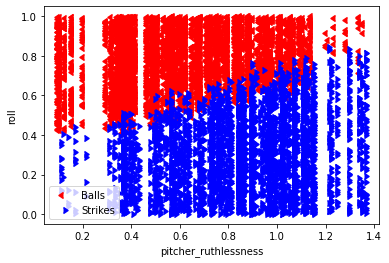

In [2]:
df['svc'] = 0.3211245789789706 * df["pitcher_ruthlessness"] + 0.2712052747280908 * df["ballpark_forwardness"]
df['batter_strikeattr'] = df['batter_moxie'] * ~df['passed'] + df['batter_patheticism'] * df['passed']
df['ruth_and_fwd'] = df['pitcher_ruthlessness'] - 0.5 * df['ballpark_forwardness']
df['ruth_and_fwd'] = df['pitcher_ruthlessness'] - 0.5 * df['ballpark_forwardness']

df = df[(df["batting_team_hype"] == 0) & (df['pitching_team_hype'] == 0)]

x_val = "pitcher_ruthlessness"
fig, ax = plt.subplots(1)
ax.scatter(df[~df['passed']][x_val], df[~df['passed']]["roll"], color="red", label="Balls", marker=CARETLEFTBASE)
ax.scatter(df[df['passed']][x_val], df[df['passed']]["roll"], color="blue", label="Strikes", marker=CARETRIGHTBASE)
ax.set_xlabel(x_val)
ax.set_ylabel('roll')
ax.legend()

fig.savefig('test.png', facecolor='white')
# endpoints = np.array(ax.get_xlim())
# ax.plot(endpoints, 0.35 + 0.35 * endpoints)

In [3]:
df.groupby('pitcher_ruthlessness').head(1)[['pitcher_ruthlessness', 'pitcher_name']].sort_values('pitcher_ruthlessness')

,pitcher_ruthlessness,pitcher_name
37,0.104391,Simba Davis
5987,0.109610,Simba Davis
2319,0.131158,Flattery McKinley
1035,0.159708,Persephone Splotter
7223,0.204305,Persephone Splotter
...,...,...
5857,1.236492,Theodore Cervantes
1041,1.289278,Brock Forbes
5992,1.327721,Gabriel Griffith
4760,1.341412,Burke Gonzales


In [4]:
df.groupby(['batter_name', 'pitcher_name']).size()

batter_name    pitcher_name    
--e- --varado  Beasley Gloom        8
               Bright Zimmerman    13
               Cornelius Games      9
               Inky Rutledge        4
               Logan Rodriguez      7
                                   ..
Ziwa Mueller   Finn James           6
               Leach Ingram         2
               Oscar Vaughan        4
               Simba Davis         15
               Winnie Hess          2
Length: 1386, dtype: int64

In [5]:
X = df[['roll', *df.columns[5:-3]]].drop('pitcher_name', 1)
y = df['passed']

/var/folders/g5/scl2096539l75kwsbhhq4pth0000gn/T/ipykernel_15321/4016361128.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df[['roll', *df.columns[5:-3]]].drop('pitcher_name', 1)


In [6]:
X

,roll,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,batter_patheticism,batter_thwackability,batter_tragicness,pitcher_ruthlessness,...,ballpark_ominousness,ballpark_inconvenience,ballpark_viscosity,ballpark_forwardness,ballpark_mysticism,ballpark_elongation,batting_team_hype,pitching_team_hype,batter_vibes,pitcher_vibes
0,0.970532,0.843691,0.951609,1.191140,1.099834,1.064446,0.490344,0.526535,0.001000,0.731703,...,0.470335,0.426239,0.342355,0.536745,0.504129,0.442981,0,0,-0.152472,-0.264691
1,0.383835,0.858400,1.049192,0.510142,0.502847,0.553971,0.511392,0.458695,0.060000,0.574806,...,0.492195,0.495179,0.481398,0.431228,0.379607,0.596597,0,0,0.499695,0.530017
2,0.005247,0.739618,0.408940,1.135055,0.436672,0.703479,0.550927,0.843383,0.703466,0.720645,...,0.439184,0.602586,0.276975,0.444631,0.482089,0.512450,0,0,0.569201,0.560984
3,0.749045,0.613727,0.334205,0.964296,0.844452,0.718053,0.230509,0.878101,0.615223,1.059238,...,0.547400,0.681991,0.263230,0.590225,0.461713,0.404077,0,0,-0.612417,0.196992
4,0.359143,0.407004,0.136416,0.070000,0.637947,0.196717,0.930000,0.528597,0.160000,1.063023,...,0.470790,0.540501,0.544272,0.440855,0.639823,0.475801,0,0,0.831981,-0.701775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8415,0.394722,1.112507,1.146854,1.094173,1.309433,0.903956,0.421251,0.481998,0.001000,1.074474,...,0.392039,0.459210,0.422151,0.566199,0.481923,0.555106,0,0,0.139435,-0.493691
8416,0.816184,1.112507,1.146854,1.094173,1.309433,0.903956,0.421251,0.481998,0.001000,1.074474,...,0.392039,0.459210,0.422151,0.566199,0.481923,0.555106,0,0,0.139435,-0.493691
8417,0.969822,0.384763,0.731317,0.764639,0.895911,0.717220,0.263042,0.445073,0.007666,0.845408,...,0.447159,0.781742,0.295662,0.574707,0.590713,0.557553,0,0,0.106567,-0.240879
8418,0.793761,1.112507,1.146854,1.094173,1.309433,0.903956,0.421251,0.481998,0.001000,1.074474,...,0.392039,0.459210,0.422151,0.566199,0.481923,0.555106,0,0,0.139435,-0.493691


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
trainedsvm = svm.SVC(kernel='linear').fit(X_train, y_train)
predictionsvm = trainedsvm.predict(X_test)
print(confusion_matrix(y_test,predictionsvm))
print(classification_report(y_test,predictionsvm))


[[938  11]
 [  5 730]]
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       949
        True       0.99      0.99      0.99       735

    accuracy                           0.99      1684
   macro avg       0.99      0.99      0.99      1684
weighted avg       0.99      0.99      0.99      1684



In [9]:
import numpy as np

coef = np.true_divide(trainedsvm.coef_,  sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]

In [10]:
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[(1.0, 'roll'),
 (-0.3324412116557764, 'pitcher_ruthlessness'),
 (-0.2369250270822803, 'ballpark_forwardness'),
 (-0.1007740182531456, 'batter_musclitude'),
 (0.08182628621781592, 'ballpark_viscosity'),
 (0.06879452082086428, 'ballpark_obtuseness'),
 (0.06301922981633631, 'ballpark_fortification'),
 (0.06297598217718124, 'ballpark_inconvenience'),
 (-0.056279794247088316, 'pitcher_vibes'),
 (-0.050538014790464866, 'ballpark_elongation'),
 (-0.04947904590660067, 'ballpark_grandiosity'),
 (0.03205690004665559, 'ballpark_mysticism'),
 (0.026107858684240336, 'defense_avg_tenaciousness'),
 (-0.016325943432740346, 'ballpark_ominousness'),
 (-0.01550437805319114, 'batter_patheticism'),
 (-0.014358134571265236, 'defense_avg_watchfulness'),
 (-0.01071000259197454, 'defense_avg_anticapitalism'),
 (-0.008627091220547656, 'pitcher_suppression'),
 (0.007153965732185209, 'pitcher_chasiness'),
 (0.007141844004435454, 'pitcher_shakespearianism'),
 (0.006645216991367713, 'batter_vibes'),
 (-0.005814652

In [11]:
intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept / coef[0, 0]

array([-0.24985957])

In [12]:
sc.inverse_transform(trainedsvm.coef_)

array([[-2.48681724,  0.64602498,  0.69436482,  0.71593056,  0.65916564,
         1.10043632,  0.42097062,  0.69349147,  0.14194996,  1.77337419,
         0.71607708,  0.76332693,  0.64303293,  0.66654682,  0.62989663,
         0.63531354,  0.65032629,  0.61109113,  0.58956465,  0.57669934,
         0.59993707,  0.58473435,  0.45596596,  0.5587602 ,  0.49054682,
         0.50550012,  0.39324695,  0.58081193,  0.49718273,  0.51596493,
         0.        ,  0.        , -0.02151701,  0.45878476]])